In [2]:
import pandas as pd
import numpy as np
import FinanceDataReader as fdr
import matplotlib.pyplot as plt

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional

In [8]:
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominator + 1e-7)

In [9]:
#포스코

def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominator + 1e-7)


df = fdr.DataReader('005930', '2018-01-01', '2023-01-01')
dfx = df[['Open','High','Low','Volume', 'Close']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['Close']]
dfx = dfx[['Open','High','Low','Volume']]
dfx=dfx.reset_index()
dfx=dfx.set_index(keys='Date')


X = dfx.values.tolist()
y = dfy.values.tolist()

#며칠데이터로 예측
window_size = 10

data_X = []
data_y = []
for i in range(len(y) - window_size):
    _X = X[i : i + window_size] 
    _y = y[i + window_size]     
    data_X.append(_X)
    data_y.append(_y)
    
    
n=len(data_y)

train_X = np.array(data_X[0:int(n*0.7)])
train_y = np.array(data_y[0:int(n*0.7)])

val_X = np.array(data_X[int(n*0.7):int(n*0.9)])
val_y = np.array(data_y[int(n*0.7):int(n*0.9)])

test_X = np.array(data_X[int(n*0.9):])
test_y = np.array(data_y[int(n*0.9):])

validation_data = (val_X,val_y)

model2 = Sequential()


forward_layer = LSTM(64, return_sequences=True)
backward_layer = LSTM(64, activation='relu', return_sequences=True,
                      go_backwards=True)

model2.add(Bidirectional(forward_layer, backward_layer=backward_layer,
                        input_shape=(10, 4)))

model2.add(Dropout(0.2))

model2.add(Bidirectional(LSTM(64)))

model2.add(Dropout(0.2))

model2.add(Dense(units=1))


model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirectio  (None, 10, 128)          35328     
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 10, 128)           0         
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 134,273
Trainable params: 134,273
Non-tr

In [10]:
model2.compile(optimizer='adam', 
              loss='mean_squared_error')
model2.fit(train_X, 
          train_y, 
          epochs=100, 
          batch_size=30,
          validation_data=validation_data
         )



pred_y = model2.predict(test_X)

Epoch 1/100
29/29 [==============================] - 7s 69ms/step - loss: 0.0456 - val_loss: 0.0189
Epoch 2/100
29/29 [==============================] - 0s 16ms/step - loss: 0.0156 - val_loss: 0.0036
Epoch 3/100
29/29 [==============================] - 0s 16ms/step - loss: 0.0060 - val_loss: 0.0033
Epoch 4/100
29/29 [==============================] - 0s 15ms/step - loss: 0.0034 - val_loss: 0.0016
Epoch 5/100
29/29 [==============================] - 0s 15ms/step - loss: 0.0034 - val_loss: 0.0016
Epoch 6/100
29/29 [==============================] - 0s 15ms/step - loss: 0.0033 - val_loss: 0.0015
Epoch 7/100
29/29 [==============================] - 0s 15ms/step - loss: 0.0031 - val_loss: 0.0025
Epoch 8/100
29/29 [==============================] - 0s 15ms/step - loss: 0.0034 - val_loss: 0.0015
Epoch 9/100
29/29 [==============================] - 0s 15ms/step - loss: 0.0026 - val_loss: 0.0014
Epoch 10/100
29/29 [==============================] - 0s 15ms/step - loss: 0.0025 - val_loss: 0.0018

29/29 [==============================] - 0s 15ms/step - loss: 0.0013 - val_loss: 0.0019
Epoch 83/100
29/29 [==============================] - 0s 17ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 84/100
29/29 [==============================] - 0s 17ms/step - loss: 0.0012 - val_loss: 9.4714e-04
Epoch 85/100
29/29 [==============================] - 0s 16ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 86/100
29/29 [==============================] - 0s 16ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 87/100
29/29 [==============================] - 1s 19ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 88/100
29/29 [==============================] - 1s 19ms/step - loss: 0.0011 - val_loss: 8.9186e-04
Epoch 89/100
29/29 [==============================] - 0s 16ms/step - loss: 0.0010 - val_loss: 0.0032
Epoch 90/100
29/29 [==============================] - 0s 17ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 91/100
29/29 [==============================] - 0s 16ms/step - loss: 0.0011 - val_loss: 8.

4/4 [==============================] - 0s 5ms/step


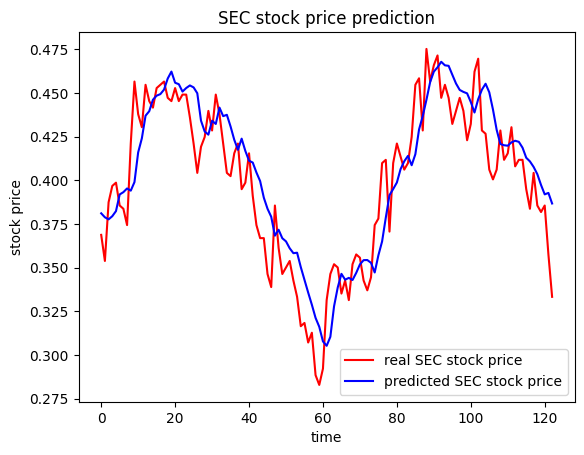

In [11]:
pred_y = model2.predict(test_X)

plt.figure()
plt.plot(test_y, color='red', label='real SEC stock price')
plt.plot(pred_y, color='blue', label='predicted SEC stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

In [12]:
#RMSE 구하기

from sklearn.metrics import mean_squared_error

def RMSE(test_y, y_predict):
   return np.sqrt(mean_squared_error(test_y, y_predict))

print("RMSE :", RMSE(test_y, pred_y))

# R2 구하기
from sklearn.metrics import r2_score
f2_y_predict = r2_score(test_y, pred_y)
print("R2 :", f2_y_predict)

RMSE : 0.02152570300437027
R2 : 0.7722938566806352
